## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the engagement and experience metrics
user_engagement = pd.read_csv('engagement_metrics.csv')
user_experience = pd.read_csv('experience_metrics.csv')

In [3]:
user_engagement_metrics = user_engagement.rename(columns={'score': 'engagement_score'})
user_engagement_metrics

,session_frequency,duration,total_traffic,clusters,engagement_score,msisdn
0,1.0,116720.0,8.786906e+08,0,0.323478,3.360100e+10
1,1.0,181230.0,1.568596e+08,2,0.239063,3.360100e+10
2,1.0,134969.0,5.959665e+08,2,0.181270,3.360100e+10
3,1.0,49878.0,4.223207e+08,0,0.441580,3.360101e+10
4,2.0,37104.0,1.457411e+09,0,0.794951,3.360101e+10
...,...,...,...,...,...,...
106851,1.0,8810.0,7.146416e+08,0,0.578704,3.379000e+10
106852,1.0,140988.0,4.803073e+08,2,0.159199,3.379000e+10
106853,1.0,325035.5,2.321240e+08,2,0.472745,3.197020e+12
106854,1.0,253030.0,5.962878e+08,2,0.218160,3.370000e+14


In [4]:
user_experience_metrics =user_experience.rename(columns={'score': 'experience_score'})
user_experience_metrics

,msisdn,tcp_retrans,avg_rtt,handset_type,avg_tp,clusters,experience_score
0,3.360100e+10,2.571697e+07,46.000000,Huawei P20 Lite Huawei Nova 3E,76.0,0,0.106571
1,3.360100e+10,2.571697e+07,31.000000,Apple iPhone 7 (A1778),99.0,0,0.161079
2,3.360100e+10,2.571697e+07,127.024885,undefined,97.0,0,0.224286
3,3.360101e+10,2.571697e+07,84.000000,Apple iPhone 5S (A1457),248.0,0,0.067828
4,3.360101e+10,1.754390e+07,59.500000,Apple iPhone Se (A1723),28422.0,1,1.159512
...,...,...,...,...,...,...,...
106851,3.379000e+10,2.180450e+05,52.000000,Huawei Honor 9 Lite,10365.0,0,0.573072
106852,3.379000e+10,2.571697e+07,40.000000,Apple iPhone 8 Plus (A1897),116.0,0,0.127781
106853,3.197020e+12,2.571697e+07,127.024885,Quectel Wireless. Quectel Ec25-E,1.0,0,0.224615
106854,3.370000e+14,2.571697e+07,127.024885,Huawei B525S-23A,33.0,0,0.224503


## Task 4.2

### Consider the average of both engagement & experience scores as the satisfaction score & report the top 10 satisfied customer.

In [5]:
# The average of both engagement & experience scores as the satisfaction score
satisfaction_metrics = pd.merge(user_engagement_metrics, user_experience_metrics, on="msisdn")
satisfaction_metrics['satisfaction_score'] = (satisfaction_metrics['engagement_score'] +
                                              satisfaction_metrics['experience_score']) / 2
score_df = satisfaction_metrics[['msisdn', 'engagement_score',
                                              'experience_score', 'satisfaction_score']]

In [6]:
satisfaction_metrics['msisdn'] = satisfaction_metrics['msisdn'].astype('int')
satisfaction_metrics['msisdn'] = satisfaction_metrics['msisdn'].astype('category')

In [7]:
satisfaction_metrics

,session_frequency,duration,total_traffic,clusters_x,engagement_score,msisdn,tcp_retrans,avg_rtt,handset_type,avg_tp,clusters_y,experience_score,satisfaction_score
0,1.0,116720.0,8.786906e+08,0,0.323478,-2147483648,2.571697e+07,46.000000,Huawei P20 Lite Huawei Nova 3E,76.0,0,0.106571,0.215025
1,1.0,181230.0,1.568596e+08,2,0.239063,-2147483648,2.571697e+07,31.000000,Apple iPhone 7 (A1778),99.0,0,0.161079,0.200071
2,1.0,134969.0,5.959665e+08,2,0.181270,-2147483648,2.571697e+07,127.024885,undefined,97.0,0,0.224286,0.202778
3,1.0,49878.0,4.223207e+08,0,0.441580,-2147483648,2.571697e+07,84.000000,Apple iPhone 5S (A1457),248.0,0,0.067828,0.254704
4,2.0,37104.0,1.457411e+09,0,0.794951,-2147483648,1.754390e+07,59.500000,Apple iPhone Se (A1723),28422.0,1,1.159512,0.977231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,1.0,8810.0,7.146416e+08,0,0.578704,-2147483648,2.180450e+05,52.000000,Huawei Honor 9 Lite,10365.0,0,0.573072,0.575888
106852,1.0,140988.0,4.803073e+08,2,0.159199,-2147483648,2.571697e+07,40.000000,Apple iPhone 8 Plus (A1897),116.0,0,0.127781,0.143490
106853,1.0,325035.5,2.321240e+08,2,0.472745,-2147483648,2.571697e+07,127.024885,Quectel Wireless. Quectel Ec25-E,1.0,0,0.224615,0.348680
106854,1.0,253030.0,5.962878e+08,2,0.218160,-2147483648,2.571697e+07,127.024885,Huawei B525S-23A,33.0,0,0.224503,0.221332


### Top 10 satisfied Customers

In [8]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [9]:
def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)

In [10]:
top_10_satisfied = score_df.sort_values(by=['satisfaction_score'], ascending= False).head(10)
top_10_satisfied

,msisdn,engagement_score,experience_score,satisfaction_score
40618,3.366057e+10,1.047102,2.317373,1.682237
100289,3.376374e+10,1.047102,2.315232,1.681167
86193,3.369872e+10,1.047102,2.308800,1.677951
66963,3.366775e+10,1.047102,2.304406,1.675754
45959,3.366186e+10,1.047102,2.288897,1.667999
89246,3.369965e+10,1.047102,2.287027,1.667065
84954,3.369832e+10,1.047102,2.285890,1.666496
31292,3.365848e+10,1.047102,2.282245,1.664673
55006,3.366406e+10,1.047102,2.271770,1.659436
54459,3.366391e+10,1.047102,2.271528,1.659315


<AxesSubplot:xlabel='msisdn'>

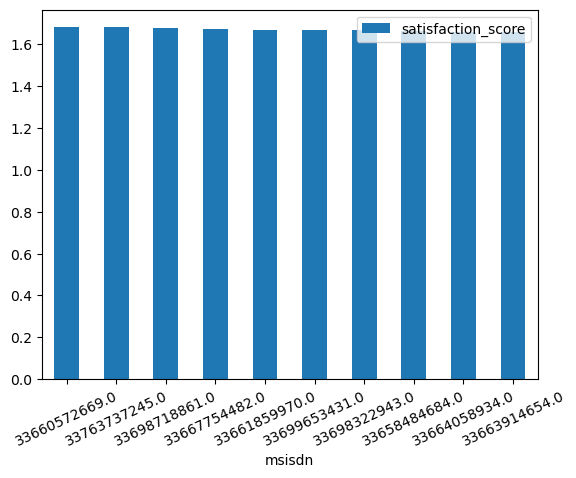

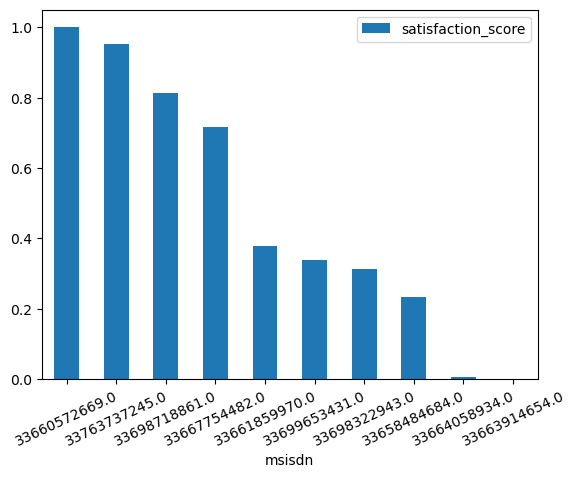

In [11]:
scaled_top_score = scaler(top_10_satisfied[['satisfaction_score']], ['satisfaction_score'])
scaled_top_score['msisdn'] = top_10_satisfied['msisdn'].to_list()

top_10_satisfied.plot(kind="bar", x='msisdn', y='satisfaction_score', rot=25)

scaled_top_score.plot(kind="bar", x='msisdn', y='satisfaction_score', rot=25)

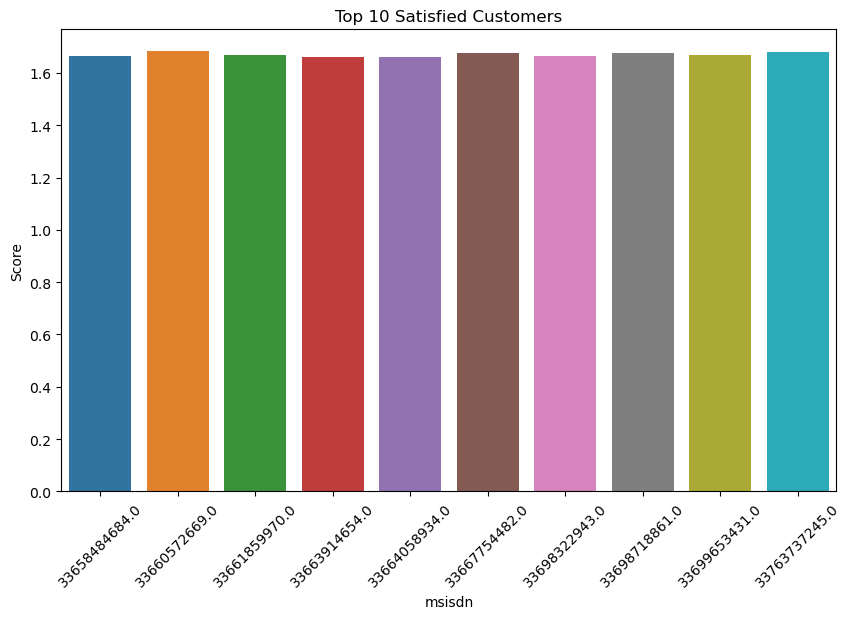

In [12]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
sns.barplot(data=top_10_satisfied, x="msisdn", y="satisfaction_score")

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the title and axis labels
plt.title('Top 10 Satisfied Customers')
plt.xlabel('msisdn')
plt.ylabel('Score')

# Display the plot
plt.show()

## Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer.

In [13]:
# Define X and y
X = score_df[['engagement_score', 'experience_score']]
y = score_df[['satisfaction_score']]

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((74799, 2), (32057, 2), (74799, 1), (32057, 1))

In [16]:
# Modelling
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Starting training
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [38]:
y_pred

array([[0.31933087],
       [0.19178349],
       [0.1994148 ],
       ...,
       [1.0026091 ],
       [0.17184047],
       [0.88570901]])

In [39]:
y_test

,satisfaction_score
64473,0.319331
83243,0.191783
39296,0.199415
44869,1.225813
99282,0.146319
...,...
73403,0.148145
97651,1.345827
16902,1.002609
47750,0.171840


In [19]:
# visualise the test and validation predictions

# visualise the validation predictions

index = []
for i in range(len(X_test)):
    index.append(i)

In [20]:
index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


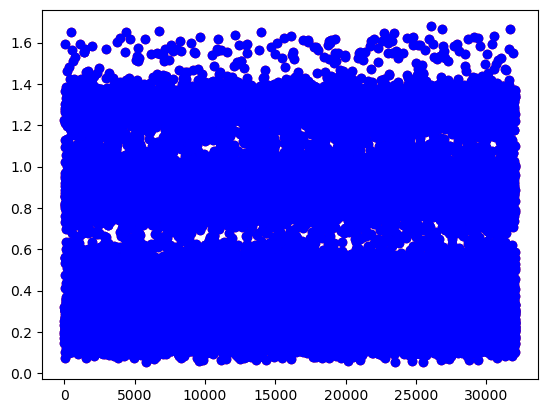

In [43]:
plt.scatter(index, y_test, color =  "red")
plt.scatter(index, y_pred, color =  "blue")

In [45]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2.891602780571118e-31


In [48]:
from sklearn.metrics import mean_absolute_error
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 4.893830416519873e-16


## Task 4.4 - Run a k-means (k=2) on the engagement & the experience score.

[Text(0.5, 1.0, 'Outlier detection for engagement_score')]

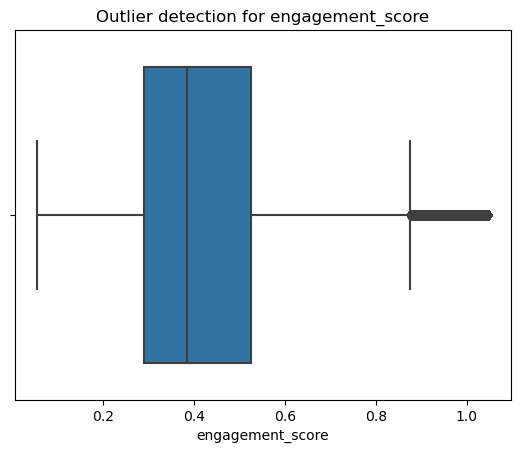

In [22]:
sns.boxplot(data=score_df, x='engagement_score').set(title="Outlier detection for engagement_score")

[Text(0.5, 1.0, 'Outlier detection for experience_score')]

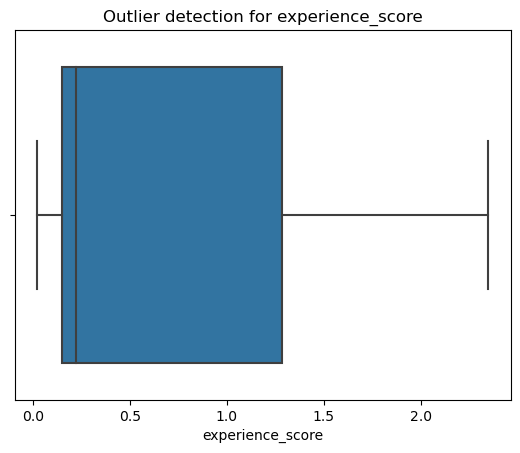

In [23]:
sns.boxplot(data=score_df, x='experience_score').set(title="Outlier detection for experience_score")

engagement_score has significant outliers so we need to handle that

In [24]:
def handle_outliers(df, col, method="lower_upper"):
    df = df.copy()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    lower_bound = q1 - ((1.5) * (q3 - q1))
    upper_bound = q3 + ((1.5) * (q3 - q1))
    
    if method == "mean":
        df[col] = np.where(df[col] < lower_bound,   df[col].mean(), df[col])
        df[col] = np.where(df[col] > upper_bound, df[col].mean(), df[col])
    
    elif  method == "mode":
        df[col] = np.where(df[col] < lower_bound,   df[col].mode()[0], df[col])
        df[col] = np.where(df[col] > upper_bound, df[col].mode()[0], df[col])
    else:
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

In [25]:
score_df_2 = score_df.copy()[['engagement_score', 'experience_score']]

cleaned_score_df = handle_outliers(score_df_2, 'engagement_score', method="lower_upper")

[Text(0.5, 1.0, 'Outlier detection for engagement_score')]

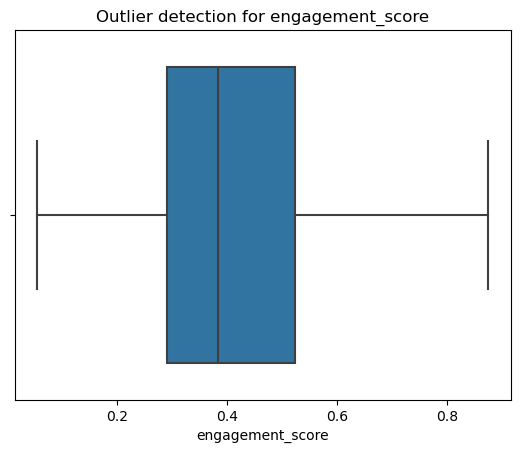

In [26]:
sns.boxplot(data=cleaned_score_df, x='engagement_score').set(title="Outlier detection for engagement_score")

### Normaliztion of cloumns

In [27]:
def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)

In [28]:
normalized_data = scale_and_normalize(cleaned_score_df, ['engagement_score', 'experience_score'])

In [29]:
normalized_data.describe().style.background_gradient(cmap = "Greens")

,engagement_score,experience_score
count,106856.000000,106856.000000
mean,0.828580,0.415970
std,0.211145,0.309587
min,0.000000,0.000000
25%,0.678975,0.142801
50%,0.952107,0.305766
75%,0.989751,0.734161
max,1.000000,1.000000


Clustering engagement & the experience score using k=2

In [30]:
kmeans = KMeans(n_clusters=2, init='k-means++').fit(normalized_data)
pred = kmeans.predict(normalized_data)

culstered_score_df = score_df.copy()
culstered_score_df['clusters'] = pred
culstered_score_df['clusters'].value_counts()

1    68943
0    37913
Name: clusters, dtype: int64

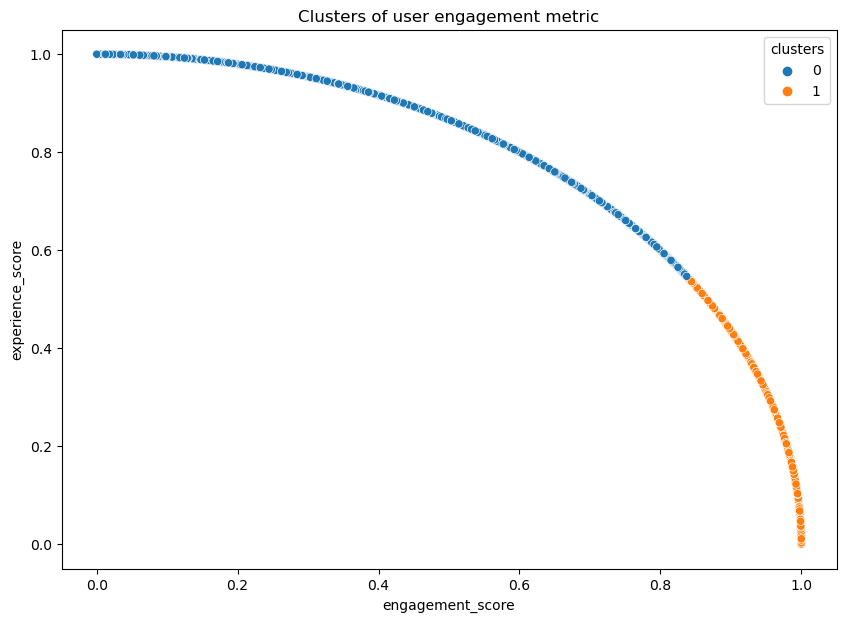

In [31]:
normalized_data2 = normalized_data.copy()
normalized_data2['clusters'] = pred

plt.figure(figsize=(10,7))


p = sns.scatterplot(x ='engagement_score', y='experience_score',
                hue='clusters', data=normalized_data2).set_title('Clusters of user engagement metric')

plt.show()

## Task 4.5 - Aggregate the average satisfaction & experience score per cluster

In [32]:
cluster_avg_scores =  culstered_score_df.groupby('clusters').agg({'engagement_score':'mean', 'experience_score':'mean',
                                           'satisfaction_score':'mean'})
styled_scores = cluster_avg_scores.style.background_gradient(cmap='Greens')
styled_scores

,engagement_score,experience_score,satisfaction_score
clusters,,,
0,0.409281,1.432687,0.920984
1,0.427961,0.235940,0.331950


## Task 4.6 Export your final table containing all user id + engagement, experience & satisfaction scores

In [34]:
# Save the DataFrame to a CSV file and export it into SQL
# creating a table called user_satisfaction
score_df.to_csv('user_satisfaction.csv', index=False)

In [35]:
user_satisfaction = pd.read_csv('user_satisfaction.csv')

In [36]:
user_satisfaction

,msisdn,engagement_score,experience_score,satisfaction_score
0,3.360100e+10,0.323478,0.106571,0.215025
1,3.360100e+10,0.239063,0.161079,0.200071
2,3.360100e+10,0.181270,0.224286,0.202778
3,3.360101e+10,0.441580,0.067828,0.254704
4,3.360101e+10,0.794951,1.159512,0.977231
...,...,...,...,...
106851,3.379000e+10,0.578704,0.573072,0.575888
106852,3.379000e+10,0.159199,0.127781,0.143490
106853,3.197020e+12,0.472745,0.224615,0.348680
106854,3.370000e+14,0.218160,0.224503,0.221332
